# Data Analysis Nanodegree
## Laila Hussain Alqawain

# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For this project, I have selected TMDb Movie dataset and I uploaded the file. I looked over the dataset and I will do some cleaning and exploring the data which that help me to answer my questions.
>
>These are my questions:
>1. What is the most runtime liked according to the most popular?
>2. How the vote rating is affected by the number of voters and over the years?
>3. Which movie had the highest and lowest runtime?
>4. Which movie had the highest and lowest popularity?
>5. Which movie had the highest and lowest vote average?
>6. Which movie had the highest and lowest voters?

In [75]:
# Import the packages that I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of report, I loaded the data. I will do some cleaning for the data and keep the columns which I need.

### General Properties

In [76]:
# Load dataset and print first two lines
df_mo = pd.read_csv('tmdb-movies.csv')
df_mo.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


> Here we can know that, there are 10866 rows and 21 columns.

In [77]:
# To know number of columns and rows in dataset
df_mo.shape

(10866, 21)

In [78]:
# To know which column has non value
df_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [79]:
df_mo.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
### Data Description

>As we see from description of the dataset, there are 0 values in some columns. Such as budget, revenue, runtime, budget_adj, and revenue_adj. 
>I will clean the dataset in Data Cleaning section.

In [80]:
# To know data type for each column 
df_mo.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='wrangling'></a>
### Change Format
> As we see above, the data type for release_date is not DateTime. I'll change it to date time format.



In [81]:
# Change data type for release_date from string to datetime
df_mo['release_date'] = pd.to_datetime(df_mo['release_date'])
df_mo['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

## Data Cleaning 
>In this section, I will do some cleaning for the dataset.
>  - Drop unneeded columns.
>  - Change the 0 values to NAN.
>  - Drop the NAN values.
>  - Drop duplicated rows.

### Drop columns 
>I will drop unneeded columns. Such as homepage, cast, tagline, revenue_adj, and budget_adj

In [82]:
# Drop columns homepage, cast, tagline, revenue_adj, and budget_adj.
df_mo.drop(['homepage', 'cast', 'tagline', 'revenue_adj', 'budget_adj', 'keywords'], axis=1, inplace=True)

In [83]:
# To check columns were deleted.
df_mo.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


> After droping columns, we can see the number on columns became 15 columns after droping 6 columns.

In [84]:
df_mo.shape

(10866, 15)

### Change the 0 values to NAN 
> - I will check how many 0 values are there in runtime column.
> - Change the 0 values to NAN in runtime.

In [85]:
zero_value = df_mo[(df_mo['runtime']==0)].shape[0]
print(zero_value)

31


### Drop the NAN values
> - As we see above, there are 31 zero values in runtime column. 
> - I will change al 31 values to NAN.

In [86]:
# Creating a variable for runtime column.
run_time=['runtime']

# Replace all the value from '0' to NAN in runtime column.
df_mo[run_time] = df_mo[run_time].replace(0, np.NAN)

# Drop all the row which has NaN value in runtime column. 
df_mo.dropna(subset = run_time, inplace = True)

rows, col = df_mo.shape
print('After droping all  NAN rows in runtime column, now we have only {} movies.'.format(rows-1))

After droping all  NAN rows in runtime column, now we have only 10834 movies.


### Drop duplicated rows
> - I will check if there any dublicated rows.
> - I will drop all dubplicated rows.

In [87]:
# Print number of duplicated of rows
print(df_mo.duplicated().sum())

1


In [88]:
# Drop a duplicated row
df_mo.drop_duplicates(inplace=True)

In [89]:
# To cofirm, there are not any duplicate row
# The result should be false
df_mo.duplicated().any()

False

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is the most runtime liked according to the most popular?

Text(0,0.5,'Average Popularity')

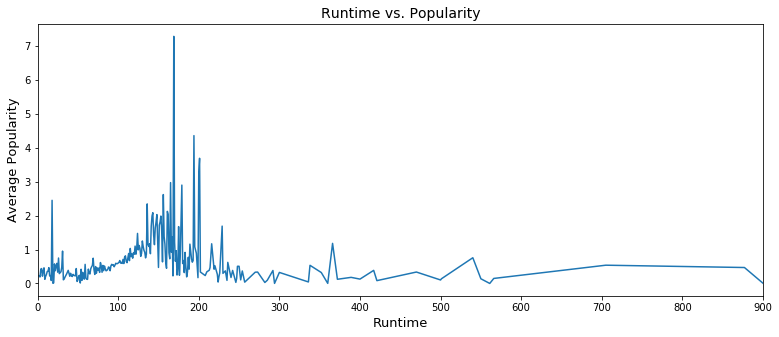

In [90]:
# Make the group by runtime and find the mean popularity and make plot.
df_mo.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the figure
plt.title("Runtime vs. Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

###### From Runtime vs. Popularity Plot, we can see the most runtime liked was between 100 and 200. It is about above 150.

### Research Question 2: How the vote rating is affected by the number of voters and over the years?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effddcd4978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7effdb41e0b8>]], dtype=object)

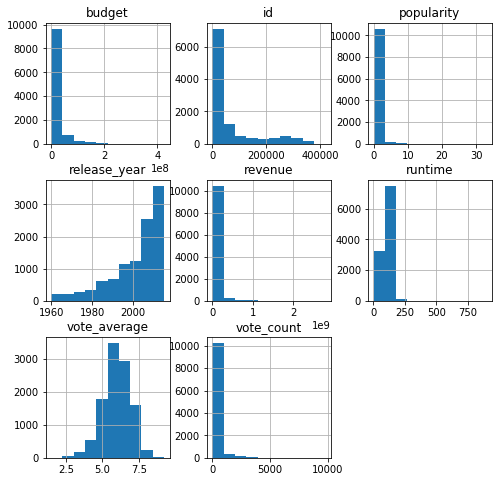

In [91]:
# Make histograms for all columns in dataset 
# To see how their shapes are
df_mo.hist(figsize=(8,8))

##### As we se from histgrams above, relaese_year histogram is Left Skewed. There is a positive relationship between the number of movie production and over the years. Also, we can see vote_average histogram is Right Skewed. So, we can say the old movise were most liked than new movise.

> ### Vote Average vs. Release Year
> In this section, we will see how the vote rating for movies is different and became lower from year to year. This confirms what we said before from histogram.

Text(0,0.5,'Vote Average')

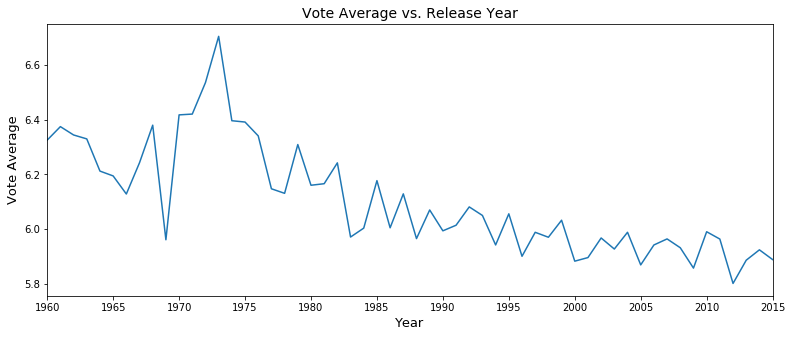

In [92]:
# Make the group by release year and find mean with vote average and make plot
df_mo.groupby('release_year').mean()['vote_average'].plot(figsize = (13,5), xticks = np.arange(1960,2016,5))

#setup the figure
plt.title("Vote Average vs. Release Year",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Vote Average',fontsize = 13)

##### From Vote Average vs. Year Plot, we can say the most vote average was above 6.6 and the movie was produced between the year 1970 and 1975.

> ### Vote Average vs. Vote Count
> In this section, we will see how the vote rating for movies is different and became higher from year to year. This confirms that the vote average increase when vote count is increased.

Text(0.5,1,'Vote Average vs. Vote Count')

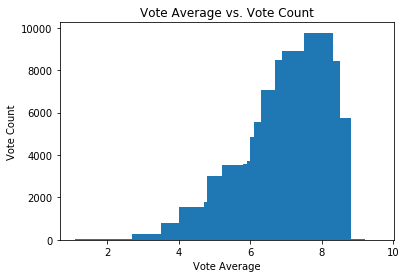

In [93]:
# Create variables for vote count and vote average
voters = df_mo['vote_count']
vote_avg = df_mo['vote_average']

# setup the plot
plt.bar(vote_avg, voters);
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.title('Vote Average vs. Vote Count')

#### From Vote Average vs. Vote Count Bar Plot, we can see the relationship between them is Right Skewed. So There is a positive relationship.

### Research Question 3: Which movie had the highest and lowest runtime?

In [95]:
# Define high_low function to return the highest and lowest values from dataset
def high_low(column_name):
    # Create variabel and use idxmin to find the lowest value
    low_index = df_mo[column_name].idxmin()
    # Create variabel and use idxmax to find the highest value.
    high_index = df_mo[column_name].idxmax()
    # Create variables that contain highest, lowest, and rest of columns
    high = pd.DataFrame(df_mo.loc[high_index,:])
    low = pd.DataFrame(df_mo.loc[low_index,:])
    
    # Print the lowest and highest movie
    print("The Highest Movie is "+ column_name + " : ",df_mo['original_title'][high_index])
    print("The Lowest Movie is "+ column_name + "  : ",df_mo['original_title'][low_index])
    return pd.concat([high,low],axis = 1)

# Call high_low function
high_low('runtime')

The Highest Movie is runtime :  The Story of Film: An Odyssey
The Lowest Movie is runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
imdb_id,tt2044056,tt2309977
popularity,0.006925,0.078472
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
director,Mark Cousins,PES
overview,"The Story of Film: An Odyssey, written and dir...",In this follow-up to his stop-motion hit Weste...
runtime,900,2
genres,Documentary,Animation


### Research Question 4: Which movie had the highest and lowest popularity?

In [96]:
# Call high_low function
high_low('popularity')

The Highest Movie is popularity :  Jurassic World
The Lowest Movie is popularity  :  North and South, Book I


,0,6181
id,135397,18729
imdb_id,tt0369610,tt0088583
popularity,32.9858,6.5e-05
budget,150000000,0
revenue,1513528810,0
original_title,Jurassic World,"North and South, Book I"
director,Colin Trevorrow,NaN
overview,Twenty-two years after the events of Jurassic ...,"Two friends, one northern and one southern, st..."
runtime,124,561
genres,Action|Adventure|Science Fiction|Thriller,Drama|History|Western


### Research Question 5: Which movie had the highest and lowest vote average?

In [97]:
# Call high_low function
high_low('vote_average')

The Highest Movie is vote_average :  The Story of Film: An Odyssey
The Lowest Movie is vote_average  :  Transmorphers


,3894,7772
id,125336,25055
imdb_id,tt2044056,tt0960835
popularity,0.006925,0.12112
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
director,Mark Cousins,Leigh Scott
overview,"The Story of Film: An Odyssey, written and dir...",About a race of alien robots that have conquer...
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction


### Research Question 6: Which movie had the highest and lowest voters?

In [98]:
# Call high_low function
high_low('vote_count')

The Highest Movie is vote_count :  Inception
The Lowest Movie is vote_count  :  The Unspoken


,1919,240
id,27205,363689
imdb_id,tt1375666,tt4229298
popularity,9.36364,0.5327
budget,160000000,0
revenue,825500000,0
original_title,Inception,The Unspoken
director,Christopher Nolan,Sheldon Wilson
overview,"Cobb, a skilled thief who commits corporate es...",In 1997 the close-knit Anderson family vanishe...
runtime,148,90
genres,Action|Thriller|Science Fiction|Mystery|Adventure,Thriller|Horror


##### From the answers of questions above, I discovered that the longest movie got the highest rating.
##### The highest runtime : 900
##### The highest vote average : 9.2 
##### The released year : 2011
##### Genres : Documentary
### The movie is The Story of Film: An Odyssey. 

<a id='conclusions'></a>
## Limitations
> From TMDb Movie Dataset, I have analyzed this data according to runtime, popularity, vote average, vote count, and release year. I have cleaned the data to get the answers to my questions. I have seen a lot of 0 values in revenue and budget. Then, I decided not to use them in the analysis. Because the analysis will be not accurate. Also, I have dropped some columns which unneeded for my questions.There are some operations that I did such as changing the data type, changing 0 values to NAN for runtime column, defining the function high_low that returns the highest and lowest values, creating different types of plots such as bar plot, line plot and histograms plot.

<a id='conclusions'></a>
## Conclusions

> From the analysis above, I have got all the answers to my questions. Now, I'm able to know the best run time of the movie for the most people, how the vote rating affected by voters and over the year, the movies which had the highest and the lowest runtime, popularity, vote average, and voters. I did some cleaning, dropping, changing the data type, changing 0 values to NAN for runtime column, defining the function high_low that returns the highest and lowest values, creating different types of plots which make easy to find the information. This analysis is very helpful for the researcher about movies. 

In [99]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0